In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


            Precipitation
Date                     
2017-08-23           0.45
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-22           0.00
...                   ...
2016-08-24           1.22
2016-08-24           1.45
2016-08-24           2.15
2016-08-24           2.15
2016-08-24           0.08

[2223 rows x 1 columns]


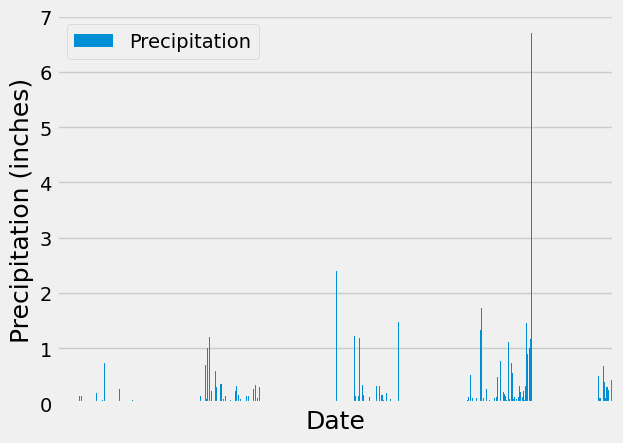

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,measurement.prcp]
query_data= session.query(*sel).filter(measurement.date>prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
query_df=pd.DataFrame(query_data,columns=['Date','Precipitation'])
date_index=query_df.set_index('Date')

# Sort the dataframe by date
sorted_data=date_index.sort_values(by='Date',ascending=False)
print(sorted_data)

# Use Pandas Plotting with Matplotlib to plot the data
query_df.plot(kind='bar', x='Date', y='Precipitation')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Precipitation (inches)', fontsize= 18)
plt.xticks([])
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics=sorted_data.describe()
summary_statistics

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(measurement.station).distinct().count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
    
#Answer the following question: which station id has the greatest number of observations?
# Station ID: USC00519281, Highest no of observations: 2772

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(measurement.station,func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(f"Minimum Temparature:{min_temp}")

max_temp = session.query(measurement.station,func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(f"Maximum Tempararture:{max_temp}")

avg_temp= session.query(measurement.station,func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(f"Average Temparature: {avg_temp}")

Minimum Temparature:[('USC00519281', 54.0)]
Maximum Tempararture:[('USC00519281', 85.0)]
Average Temparature: [('USC00519281', 71.66378066378067)]


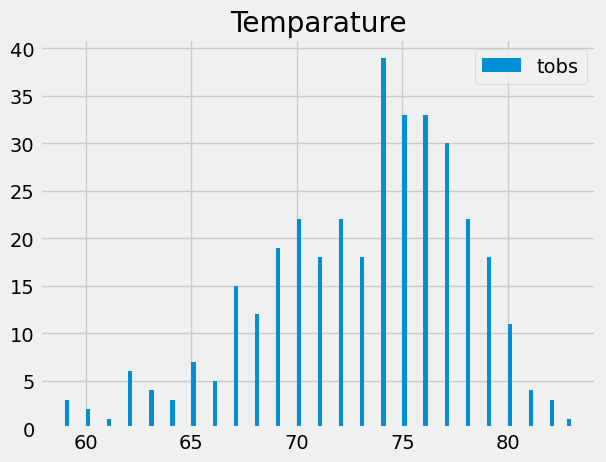

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_1= [measurement.station,measurement.date,measurement.tobs]
query_data_2= session.query(*sel_1).filter(measurement.date>prev_year).\
    filter(measurement.station == 'USC00519281').all()
station_data=pd.DataFrame(query_data_2,columns=['Station','Date','Temparature'])
station_data.set_index('Station')

#plot histogram

station_data.hist(column='Temparature', bins=120,label='tobs')
plt.legend()

plt.show()

# Close session

In [16]:
# Close Session
session.close()